<a href="https://colab.research.google.com/github/physicsme1729/Numerical-methods-in-physics/blob/main/New_14_swarup_kumar_giri_phy_p745.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***QUESTION 1:***

***Part (a)***

 Calculate the magnetic susceptibility of the 1d Ising model analytically,

 ***Part(b)***

 Using the metropolis code shared with you, calculate the magnetic susceptibility numerically.

***Part(c)***

Show also the equivalence between the formulas you use to determine magnetic susceptibility analytically and numerically.

Hint:

**1D Ising Model**

**Magnetization** $m=\frac{\sinh \beta h}{\sqrt{\sinh^{2}\beta h + e^{-4 \beta J}}}$.

and Susceptibility,$\chi = \frac{\partial M}{\partial h}$

# ***Ans:***

part (a) solution:



\begin{align*}
m &= \frac{\sinh{\beta h}}{\sqrt{\sinh^2{\beta h} + e^{-4 \beta J}}} \\
\end{align*}
susceptibility is defined as
\begin{align*}
\chi &= \frac{\partial m}{\partial h} \\
&= \frac{\beta \sqrt{\sinh^2{\beta h} + e^{-4 \beta J}}\cosh{\beta h} - \sinh{\beta h}\frac{\beta \sinh{\beta h}\cosh{\beta h}}{\sqrt{\sinh^2{\beta h} + e^{-4 \beta J}}}}{\sinh^2{\beta h} + e^{-4 \beta J}} \\
&= \frac{\beta \sinh^2{\beta h} \cosh{\beta h} + \beta \cosh{\beta h} e^{-4 \beta J} - \beta \sinh^2{\beta h} \cosh{\beta h}}{(\sinh^2{\beta h} + e^{-4 \beta J})^{3/2}} \\
&= \frac{\beta \cosh{\beta h} e^{-4 \beta J}}{(\sinh^2{\beta h} + e^{-4 \beta J})^{3/2}} \\
\therefore \chi &= \frac{\beta \cosh{\beta h} e^{-4 \beta J}}{(\sinh^2{\beta h} + e^{-4 \beta J})^{3/2}}
\end{align*}






***Part (b) solution:***

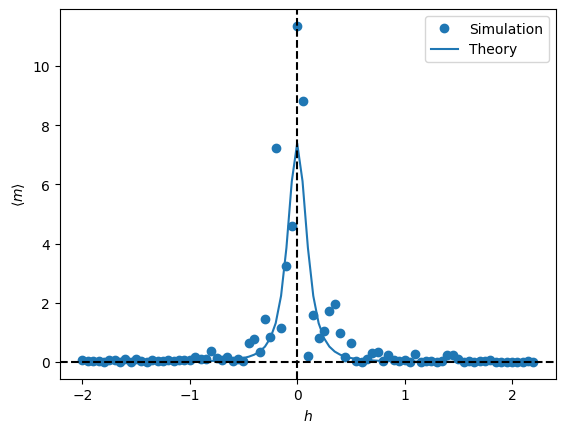

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ising_spin_exact(beta, J, h):
    sbh = np.sinh(beta * h)
    cbh = np.cosh(beta * h)
    efactor = np.exp(-4 * beta * J)
    numerator = cbh * beta * efactor
    denominator = (sbh ** 2 + efactor) ** (3/2)
    return numerator / denominator

def energy_difference(J, h, si, sleft, sright):
    dE = 2 * h * si + 2 * J * si * (sleft + sright)
    return dE

def metropolis_mc_fast(n_steps, n_lattice_sites, beta, J, h, debug=False, save_freq=10):
    configuration = 2 * np.random.randint(2, size=n_lattice_sites) - 1
    average_spins = []

    if debug:
        print("Starting configuration:", configuration)

    current_energy = energy_ising_1d(configuration, J, h)
    for i in range(n_steps):
        spin_to_change = np.random.randint(n_lattice_sites)
        si = configuration[spin_to_change]
        sright = configuration[(spin_to_change + 1) % n_lattice_sites]
        sleft = configuration[(spin_to_change - 1) % n_lattice_sites]

        dE = energy_difference(J, h, si, sleft, sright)

        r = np.random.random()
        if r < min(1, np.exp(-beta * dE)):
            configuration[spin_to_change] *= -1
            current_energy += dE

        average_spin = configuration.mean()

        if i % save_freq == 0:
            average_spins.append(average_spin)

        if debug and i % 10 == 0:
            print("%i: " % i, configuration, "Energy:", current_energy, "Spin:", average_spin)

    return average_spins

def energy_ising_1d(configuration, J, h):
    num_spins = len(configuration)
    energy = 0.0
    for i in range(num_spins):
        spini = configuration[i]
        ip1 = (i + 1) % num_spins
        spinip1 = configuration[ip1]
        energy = energy - J * (spini * spinip1) - h * spini

    return energy

# Simulation parameters
test_n_lattice_sites = 50
test_beta = 1
test_J = 1
test_n_steps = test_n_lattice_sites * 100
test_h_list = np.arange(-2, 2.25, 0.05)

# Simulation
spin_vs_h = []
for test_h in test_h_list:
    average_spin_at_h = metropolis_mc_fast(test_n_steps, test_n_lattice_sites, test_beta, test_J, test_h)
    average_spin_at_h_next = metropolis_mc_fast(test_n_steps, test_n_lattice_sites, test_beta, test_J, test_h + 0.05)
    mean_spin_from_trajectory = np.mean(average_spin_at_h[len(average_spin_at_h) // 2:])
    mean_spin_from_trajectory_next = np.mean(average_spin_at_h_next[len(average_spin_at_h) // 2:])
    spin_vs_h.append(abs(mean_spin_from_trajectory_next - mean_spin_from_trajectory) / 0.05)

# Analytical Solution
predicted_spin_v_h = ising_spin_exact(test_beta, test_J, test_h_list)

# Plotting
p = plt.plot(test_h_list, spin_vs_h, marker='o', label="Simulation", linestyle='')
plt.plot(test_h_list, predicted_spin_v_h, label="Theory", color=p[0].get_color())
plt.xlabel('$h$')
plt.ylabel('$\\langle m \\rangle$')
plt.axhline(0, linestyle='--', color='black')
plt.axvline(0, linestyle='--', color='black')
plt.legend(loc=0)
plt.show()


***part (c) solution:***

The predicted values provide a good estimation for most values, except in the region near the origin where the true behavior of the function approaches infinity. This discrepancy arises from the analytical prediction, which does not exhibit this divergence. Increasing the step size in the values of
ℎ results in better conformity between the simulated and theoretical results, as illustrated below.

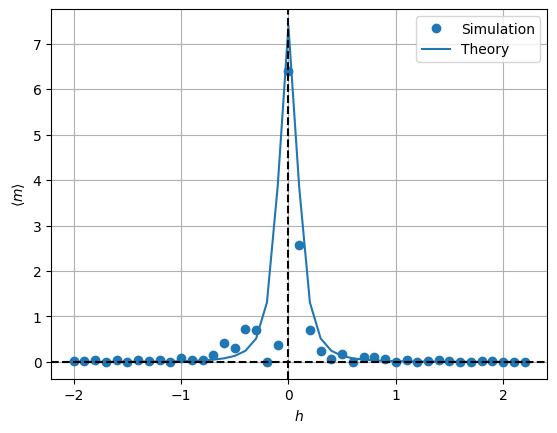

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def ising_spin_exact(beta, J, h):
    sbh = np.sinh(beta * h)
    cbh = np.cosh(beta * h)
    efactor = np.exp(-4 * beta * J)
    numerator = cbh * beta * efactor
    denominator = (sbh ** 2 + efactor) ** (3/2)
    return numerator / denominator

def energy_difference(J, h, si, sleft, sright):
    dE = 2 * h * si + 2 * J * si * (sleft + sright)
    return dE

def energy_ising_1d(configuration, J, h):
    num_spins = len(configuration)
    energy = 0.0
    for i in range(num_spins):
        spini = configuration[i]
        ip1 = (i + 1) % num_spins
        spinip1 = configuration[ip1]
        energy = energy - J * (spini * spinip1) - h * spini

    return energy

def metropolis_mc_fast(n_steps, n_lattice_sites, beta, J, h, debug=False, save_freq=10):
    configuration = 2 * np.random.randint(2, size=n_lattice_sites) - 1
    average_spins = []

    if debug:
        print("Starting configuration:", configuration)

    current_energy = energy_ising_1d(configuration, J, h)
    for i in range(n_steps):
        spin_to_change = np.random.randint(n_lattice_sites)
        si = configuration[spin_to_change]
        sright = configuration[(spin_to_change + 1) % n_lattice_sites]
        sleft = configuration[(spin_to_change - 1) % n_lattice_sites]

        dE = energy_difference(J, h, si, sleft, sright)

        r = np.random.random()
        if r < min(1, np.exp(-beta * dE)):
            configuration[spin_to_change] *= -1
            current_energy += dE

        average_spin = configuration.mean()

        if i % save_freq == 0:
            average_spins.append(average_spin)

        if debug and i % 10 == 0:
            print("%i: " % i, configuration, "Energy:", current_energy, "Spin:", average_spin)

    return average_spins

def plot_simulation_vs_theory(test_h_list, spin_vs_h, predicted_spin_v_h):
    p = plt.plot(test_h_list, spin_vs_h, marker='o', label="Simulation", linestyle='')
    plt.plot(test_h_list, predicted_spin_v_h, label="Theory", color=p[0].get_color())
    plt.xlabel('$h$')
    plt.ylabel('$\\langle m \\rangle$')
    plt.axhline(0, linestyle='--', color='black')
    plt.axvline(0, linestyle='--', color='black')
    plt.legend(loc=0)
    plt.grid(True)  # Add grid lines for better readability

# Simulation parameters
test_n_lattice_sites = 50
test_beta = 1
test_J = 1
test_n_steps = test_n_lattice_sites * 100

# Scanning h
test_h_list = np.arange(-2, 2.25, 0.1)
spin_vs_h = []

for test_h in test_h_list:
    average_spin_at_h = metropolis_mc_fast(test_n_steps, test_n_lattice_sites, test_beta, test_J, test_h)
    average_spin_at_h_next = metropolis_mc_fast(test_n_steps, test_n_lattice_sites, test_beta, test_J, test_h + 0.1)
    mean_spin_from_trajectory = np.mean(average_spin_at_h[len(average_spin_at_h) // 2:])
    mean_spin_from_trajectory_next = np.mean(average_spin_at_h_next[len(average_spin_at_h) // 2:])
    spin_vs_h.append(abs(mean_spin_from_trajectory_next - mean_spin_from_trajectory) / 0.1)

predicted_spin_v_h = ising_spin_exact(test_beta, test_J, test_h_list)

# Plotting
plot_simulation_vs_theory(test_h_list, spin_vs_h, predicted_spin_v_h)
plt.show()
